In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [12]:
# Importamos el dataset de trabajo
df = pd.read_csv('./dataset/movies_limpio.csv',  delimiter=',')

In [14]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'release_month', 'release_day_of_week',
       'retorno'],
      dtype='object')

In [15]:
#Eliminamos las columnas que no usaremos
df = df.drop(columns = ['belongs_to_collection','original_language','production_companies','production_countries','release_month','release_day_of_week', 'retorno']) 

In [19]:
df.head()

,budget,genres,id,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995


In [16]:
df.describe() # Estadistica descriptiva

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.536300e+04,45363.000000,45363.000000,4.536300e+04,45117.000000,45363.000000,45363.000000,45363.000000
mean,4.233796e+06,108030.387452,2.926515,1.123331e+07,94.178181,5.624064,110.117453,1991.879638
std,1.744222e+07,112175.538880,6.010299,6.439890e+07,38.345037,1.915402,491.810701,24.057134
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000
25%,0.000000e+00,26387.500000,0.388835,0.000000e+00,85.000000,5.000000,3.000000,1978.000000
50%,0.000000e+00,59857.000000,1.130302,0.000000e+00,95.000000,6.000000,10.000000,2001.000000
75%,0.000000e+00,156556.500000,3.691946,0.000000e+00,107.000000,6.800000,34.000000,2010.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000


In [23]:

print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (45363, 15)
Nombre columnas: Index(['budget', 'genres', 'id', 'overview', 'popularity', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year'],
      dtype='object')


In [33]:
import ast
def extraer_nombre(nombre_columna):
    # Convierte el valor de la columna en un diccionario
    if pd.isna(nombre_columna):
        return None
    diccionario = ast.literal_eval(nombre_columna)

    print(diccionario)
    # Extrae el valor de "name" si está presente en el diccionario
    if isinstance(diccionario, dict) and 'name' in diccionario:
        return diccionario['name']
    else:
        return None

In [35]:
# Calificaciones de películas por genero
df1_bys = df.groupby(['vote_average']).count()
df1_bys.head()
# debo desglosar el genero. queda pendiente el eda

,budget,genres,id,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_count,release_year
vote_average,,,,,,,,,,,,,,
0.0,2946,2946,2946,2753,2946,2946,2946,2854,2946,2922,655,2946,2946,2946
0.5,13,13,13,11,13,13,13,13,13,13,4,13,13,13
0.7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,103,103,103,96,103,103,103,99,103,101,30,103,103,103
1.1,1,1,1,1,1,1,1,1,1,1,0,1,1,1


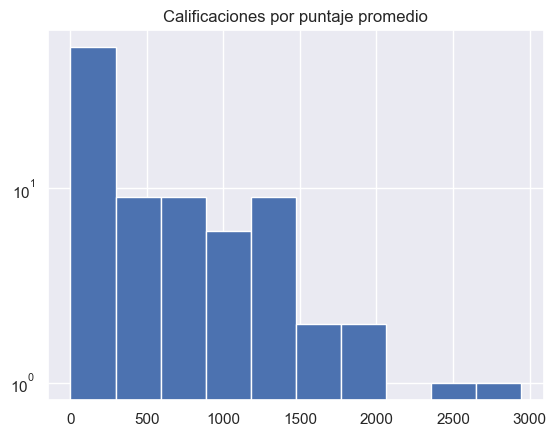

In [38]:
plt.hist(df1_bys.vote_count, log= True)
plt.title('Calificaciones por puntaje promedio')
plt.show()